# Qualifying lap comparison

Let's take a look at the difference between P1 and P20 from qualifying for the Grand Prix.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import fastf1.plotting

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(
  mpl_timedelta_support=True,
  misc_mpl_mods=False,
  color_scheme='fastf1'
)

# Define parameters
season = 2025
race = 'Miami'
p1 = 'VER'
p20 = 'BEA'
session = 'Q'

# Load session data
session = fastf1.get_session(
  season,
  race,
  session
)
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (1.98 GB) /Users/mjbernha/Library/Caches/fastf1
core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '12', '81', '63', '55', '23', '16', '31', '22', '6', '44', '5', '7', '30', '27', '14', '10', '18', '87']


In [2]:
p1_lap = session.laps.pick_drivers(p1).pick_fastest()
p20_lap = session.laps.pick_drivers(p20).pick_fastest()

p1_tel = p1_lap.get_car_data().add_distance()
p20_tel = p20_lap.get_car_data().add_distance()

In [3]:
p1_tel.columns

Index(['Date', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Time', 'SessionTime', 'Distance'],
      dtype='object')

In [4]:
p1_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2025-05-03 21:13:09.803,10503.0,295.0,8,100.0,False,12,car,0 days 00:00:00.082000,0 days 01:11:49.776000,6.719444
1,2025-05-03 21:13:10.043,10513.0,298.0,8,100.0,False,12,car,0 days 00:00:00.322000,0 days 01:11:50.016000,26.586111
2,2025-05-03 21:13:10.323,10700.0,301.0,8,100.0,False,12,car,0 days 00:00:00.602000,0 days 01:11:50.296000,49.997222
3,2025-05-03 21:13:10.643,10858.0,304.0,8,100.0,False,12,car,0 days 00:00:00.922000,0 days 01:11:50.616000,77.019444
4,2025-05-03 21:13:11.003,10913.0,307.0,8,100.0,False,12,car,0 days 00:00:01.282000,0 days 01:11:50.976000,107.719444
...,...,...,...,...,...,...,...,...,...,...,...
316,2025-05-03 21:14:34.243,10736.0,269.0,7,100.0,False,8,car,0 days 00:01:24.522000,0 days 01:13:14.216000,5217.548889
317,2025-05-03 21:14:34.603,10963.0,273.0,7,100.0,False,12,car,0 days 00:01:24.882000,0 days 01:13:14.576000,5244.848889
318,2025-05-03 21:14:35.043,11048.0,279.0,7,100.0,False,12,car,0 days 00:01:25.322000,0 days 01:13:15.016000,5278.948889
319,2025-05-03 21:14:35.483,11184.0,282.0,7,100.0,False,12,car,0 days 00:01:25.762000,0 days 01:13:15.456000,5313.415556


req            INFO 	Using cached data for driver_info


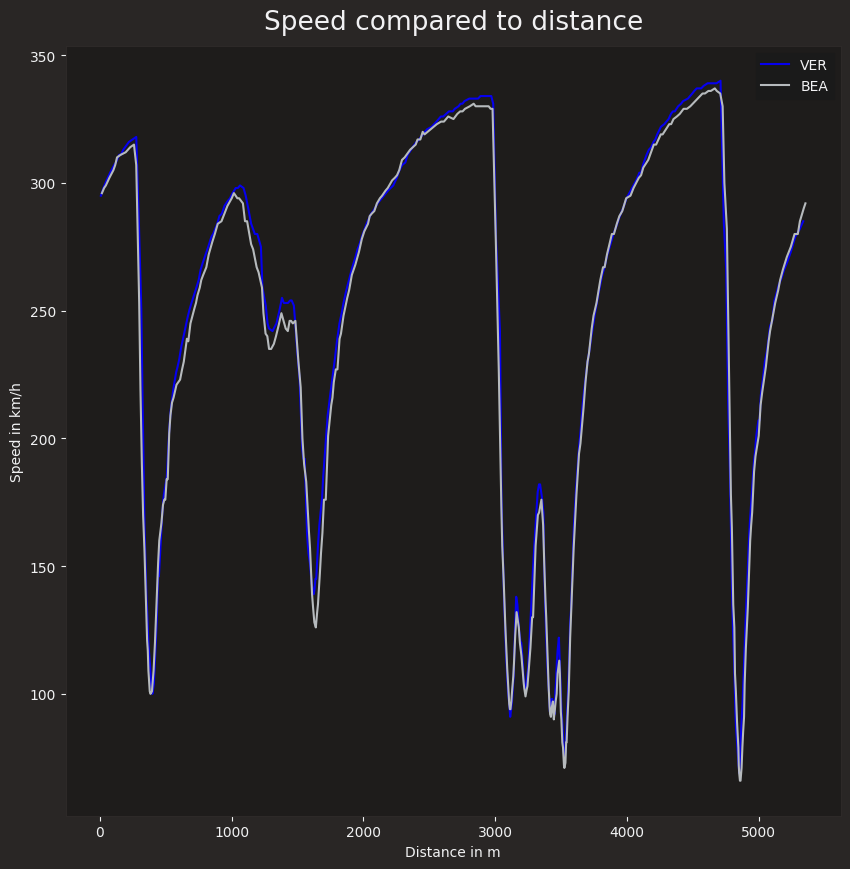

In [5]:
p1_color = fastf1.plotting.get_team_color(p1_lap['Team'], session=session)
p20_color = fastf1.plotting.get_team_color(p20_lap['Team'], session=session)

fig, ax = plt.subplots(
  figsize=(10,10)
)

ax.plot(
  p1_tel['Distance'],
  p1_tel['Speed'],
  color=p1_color,
  label=p1
)

ax.plot(
  p20_tel['Distance'],
  p20_tel['Speed'],
  color=p20_color,
  label=p20
)

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.set_title('Speed compared to distance')
ax.legend()
plt.show()


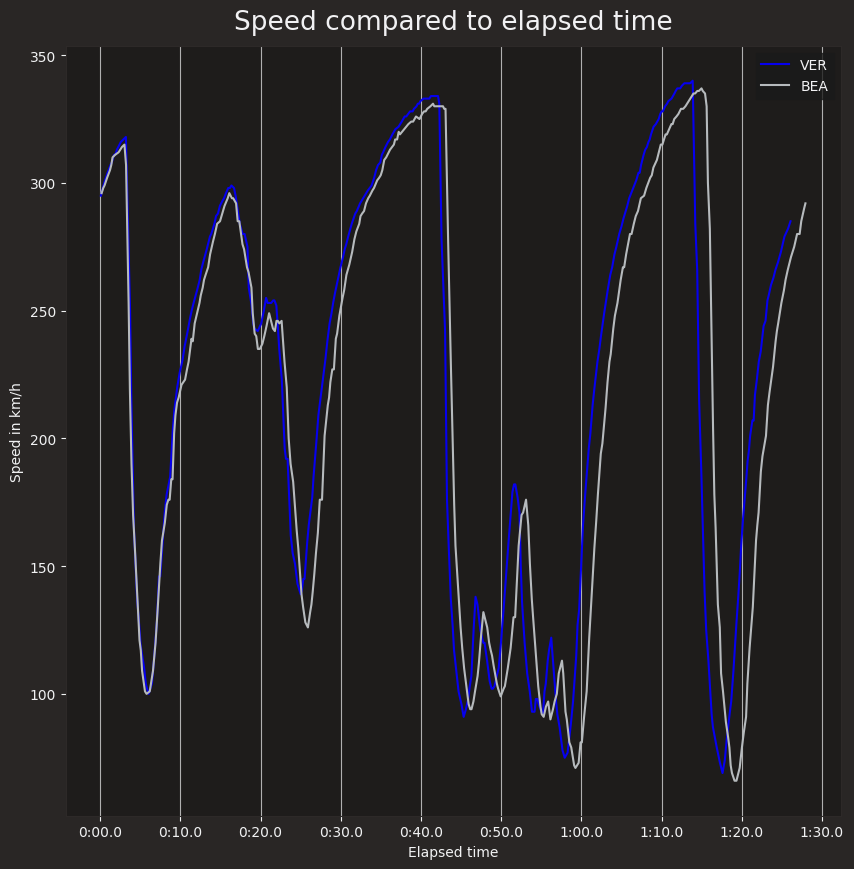

In [6]:
fig, ax = plt.subplots(
  figsize=(10,10)
)

ax.plot(
  p1_tel['Time'],
  p1_tel['Speed'],
  color=p1_color,
  label=p1
)

ax.plot(
  p20_tel['Time'],
  p20_tel['Speed'],
  color=p20_color,
  label=p20
)

ax.set_xlabel('Elapsed time')
ax.set_ylabel('Speed in km/h')
ax.grid(axis='x')

ax.set_title('Speed compared to elapsed time')
ax.legend()
plt.show()


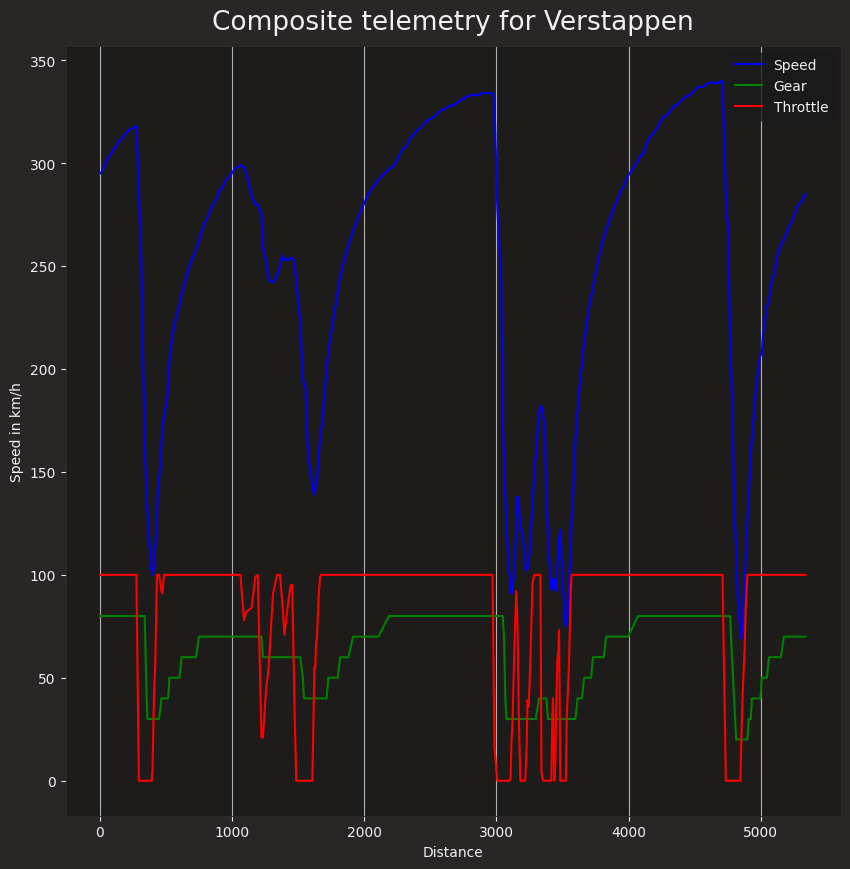

In [7]:
fig, ax = plt.subplots(
  figsize=(10,10)
)

ax.plot(
  p1_tel['Distance'],
  p1_tel['Speed'],
  color="blue",
  label='Speed'
)

ax.plot(
  p1_tel['Distance'],
  p1_tel['nGear']*10,
  color="green",
  label='Gear'
)

ax.plot(
  p1_tel['Distance'],
  p1_tel['Throttle'],
  color="red",
  label='Throttle'
)

ax.set_xlabel('Distance')
ax.set_ylabel('Speed in km/h')
ax.grid(axis='x')

ax.set_title('Composite telemetry for Verstappen')
ax.legend()
plt.show()


---

This is the end of the notebook.